# Project 2: Image Processing - Identifying Road Segment From Satellite Images

This jupyter notebook contains our journey to train a Convolutional Neural Network(CNN) for road segmentation in aerial images. Three different training on two different model are shown. 

Dataset can be downloaded [here](https://www.aicrowd.com/challenges/epfl-ml-road-segmentation/dataset_files).

**Authors:** : [Luca Carroz](https://people.epfl.ch/emilie.carroz), [David Schroeter](https://people.epfl.ch/david.schroeter), [Paulo Ribeiro de Carvalho](https://people.epfl.ch/paulo.ribeirodecarvalho)

<hr style="clear:both">

## Import

In [1]:
from utils.cnn_viewer import *
from utils.helpers import *
from utils.img_transformation import show_transformations

%load_ext autoreload
%autoreload 2

/home/david/Documents/development_environment/miniconda3/envs/ML/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/david/Documents/development_environment/miniconda3/envs/ML/lib/python3.9/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


## Load Data

In [2]:
# Set the paths to the images to load
training_folder_path = "dataset/training"
images_path = training_folder_path + "/images"
ground_truth_path = training_folder_path + "/groundtruth"

# Load all the training images
images = load_images(images_path)
ground_truth = load_images(ground_truth_path)

## Exploratory Data Analysis

You should learn about your dataset - figure out which features are continuous, which ones are categorical, check if there are obvious relationships between the features, take a look at the distribution of each feature, and so on ([link](https://en.wikipedia.org/wiki/Exploratory_data_analysis))

Number of image : 100
Image's dimensions : RGB - (400, 400)
Ground truth's dimensions : L - (400, 400)


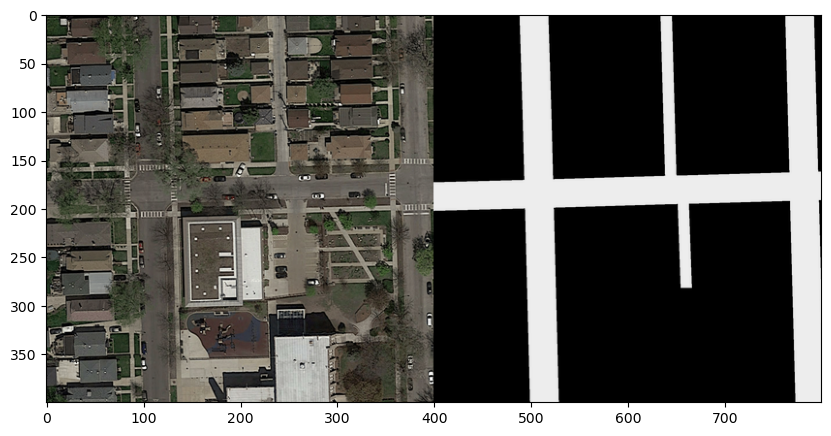

In [3]:
# How many images do we have to train the model ?
images_number = len(images)

# What are the dimensions of each image ?
image_dim = images[0].size
image_mode = images[0].mode
ground_truth_dim = ground_truth[0].size
ground_truth_mode = ground_truth[0].mode

print(f"Number of image : {images_number}\n"
      f"Image's dimensions : {image_mode} - {image_dim}\n"
      f"Ground truth's dimensions : {ground_truth_mode} - {ground_truth_dim}")

# Select the paired images to see (image + ground truth)
i = 1
img_and_gt = concatenate_images(images[i], ground_truth[i])  # concat both images

plt.figure(figsize=(10, 10))
plt.imshow(img_and_gt, cmap='Greys')
plt.show()

## Data Augmentation

Since we only have few images, we need to increase the inputs to give to our model. To do so, we can crop, rotate, flip, change the color (to grey), add gaussian noise, and so on (i.e. Transformation inspired by Lecture 8b, slide "DataAugmentation").

*Note*: Those transformation were for visualisation only, to get a sense of which transformation we wanted to apply, but we eventually used pytorch transformation function for efficiency reasons.  

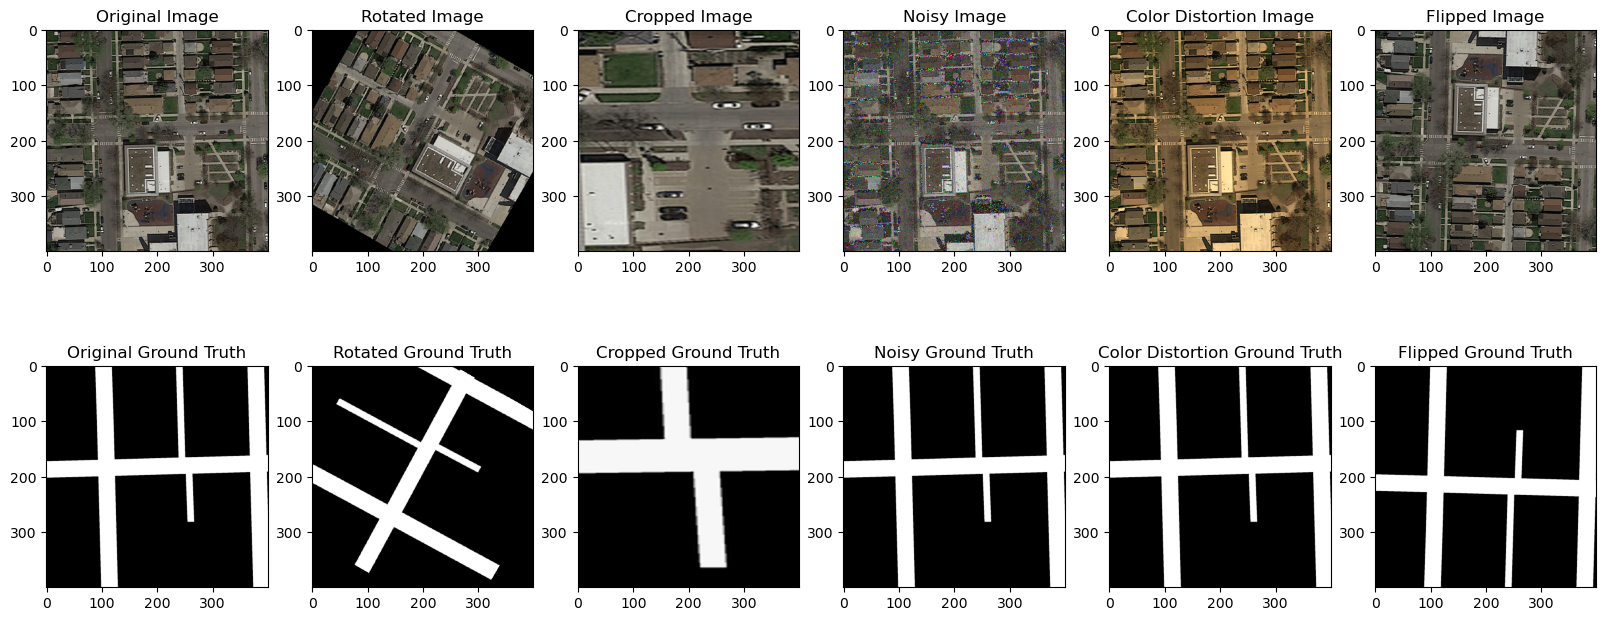

In [4]:
# Select the image
i = 1
img = images[i]
gt = ground_truth[i]

# Select the parameters
angle = 60
box = (200, 100, 300, 300)  # (left, upper, right, lower)
mean = 0
std = 20  # parameters for gaussian noise, reduce the std to have less perturbation
scale_factors = (1.3, 1.1, 0.8)  # choose the scale factor for each channel

# Display all transformations
show_transformations(img, gt, angle, box, mean, std, scale_factors)

## Models

This section will display the results of our models.

### UNet

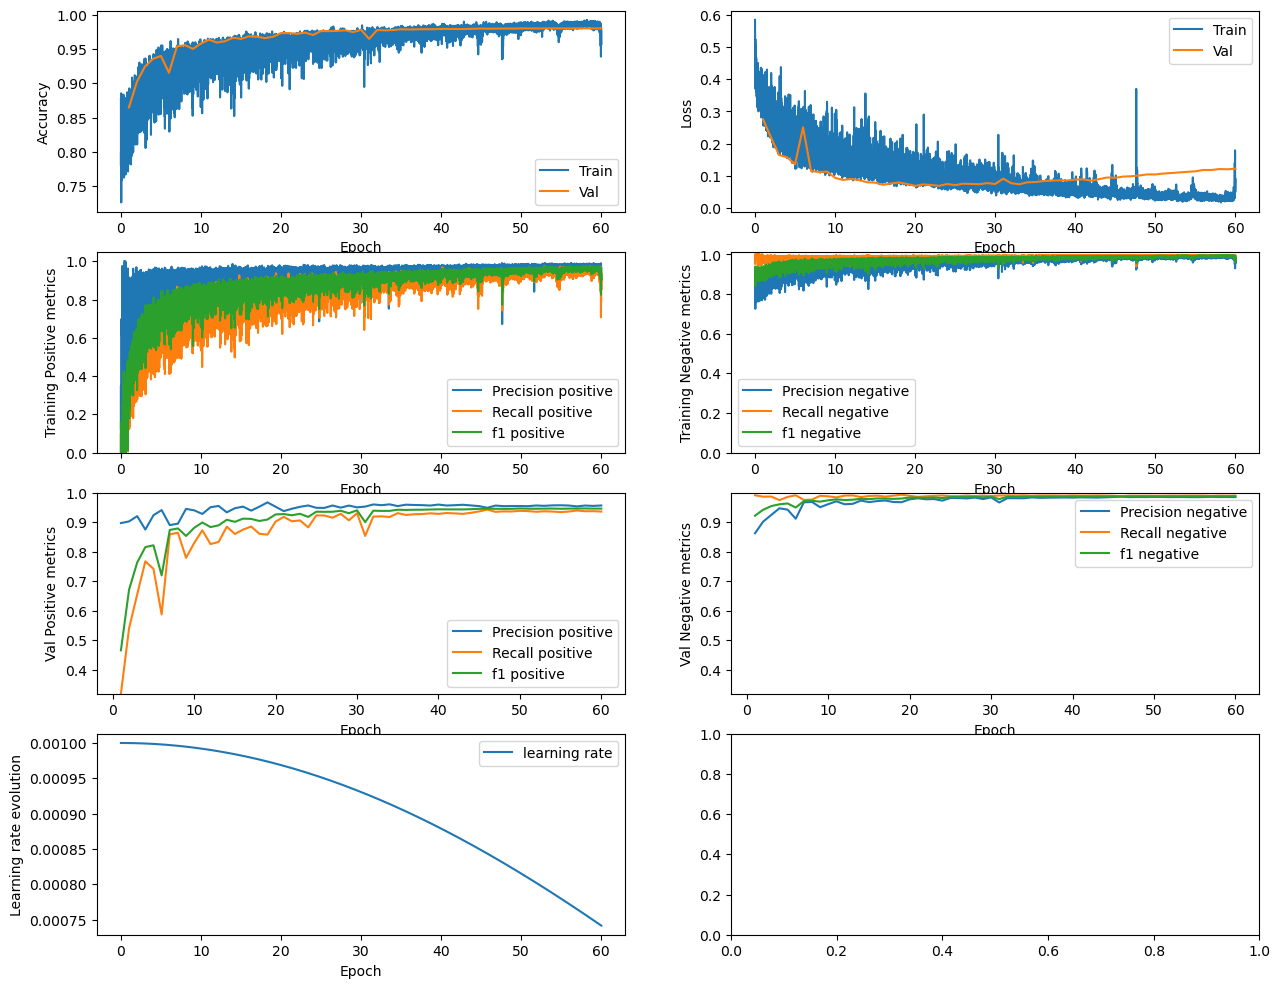

In [5]:
u_net_viewer = CnnViewer('models/u-net/training_save_epoch_60.tar')
u_net_viewer.print_training_stats()

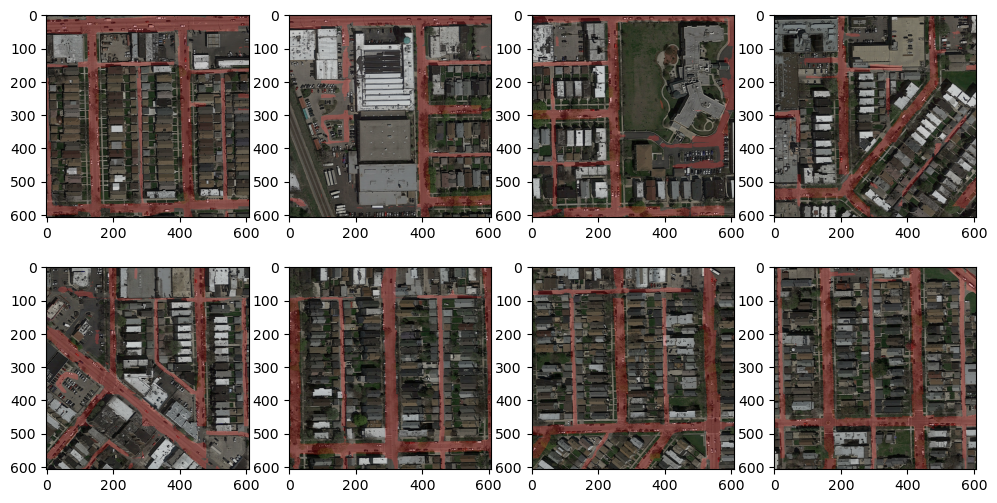

In [6]:
display_test_predictions(model=u_net_viewer,
                         nb=8,
                         test_images_path='dataset/test_set_images')

### UNet 96x96

Fix the model environment parameters.


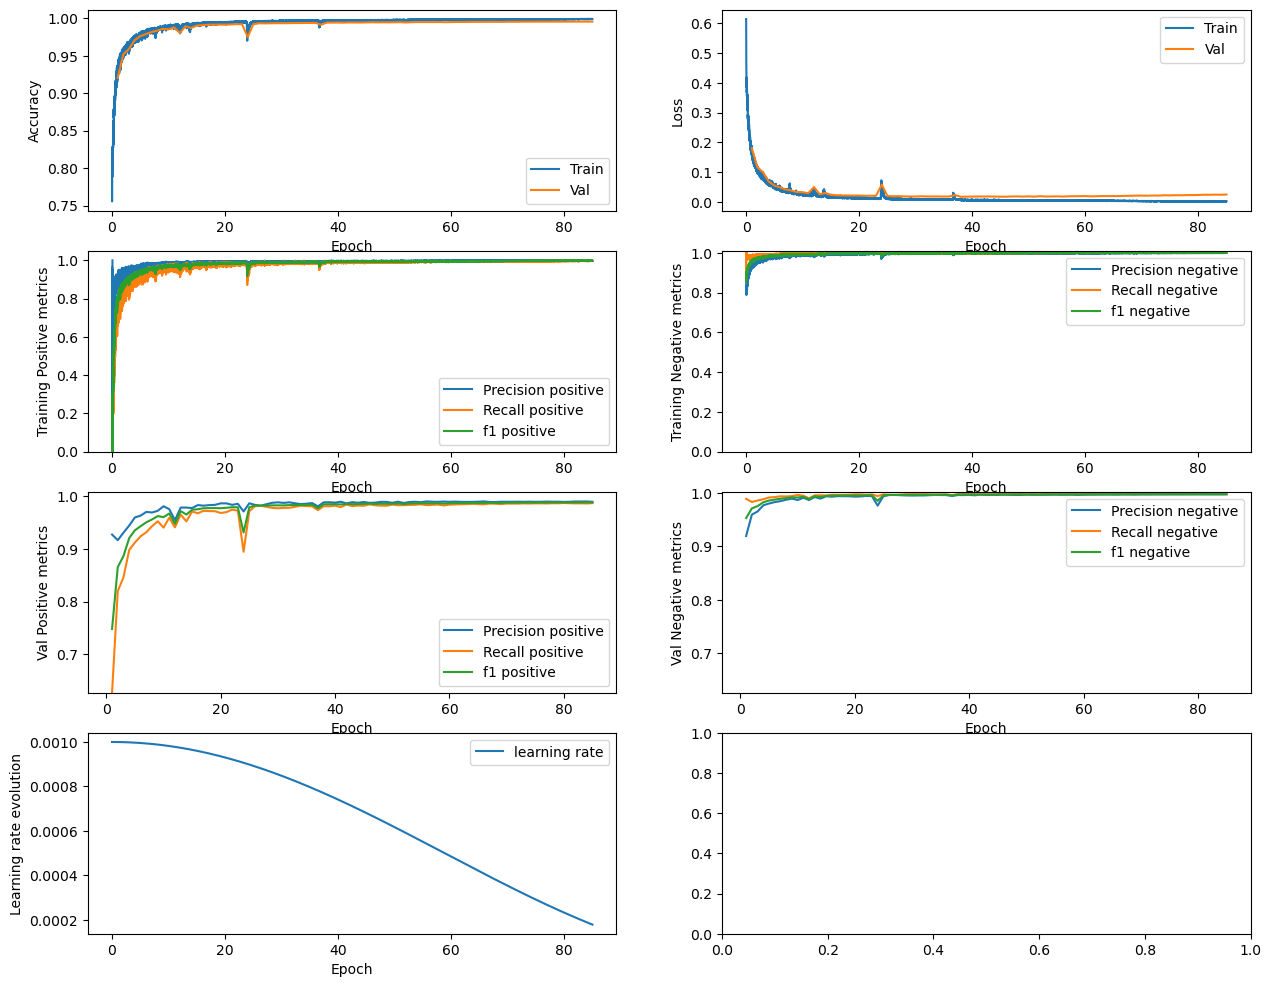

In [7]:
u_net_viewer.restore_model('models/u-net_96x96/training_save_epoch_85.tar')
u_net_viewer.print_training_stats()

Print the predictions to see the result.

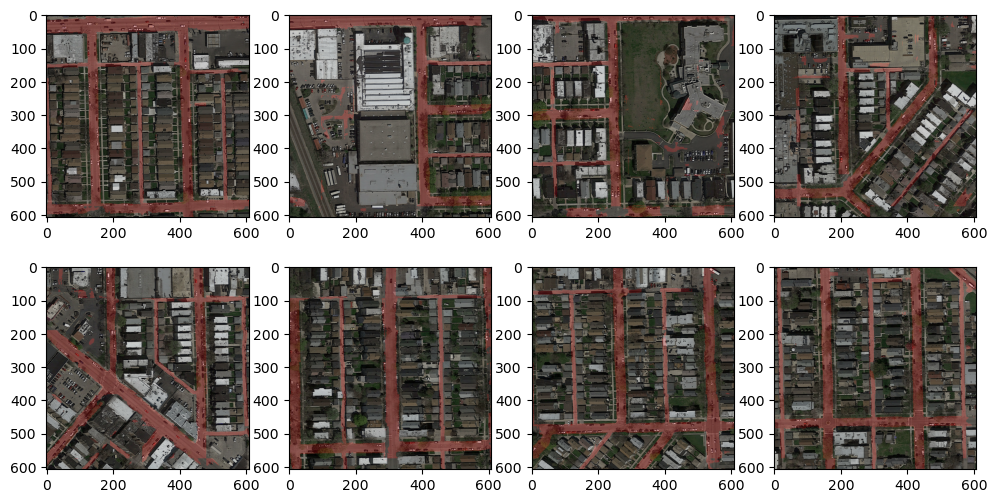

In [8]:
display_test_predictions(model=u_net_viewer,
                         nb=8,
                         test_images_path='dataset/test_set_images')

### DLink-Net

Fix the model environment parameters.

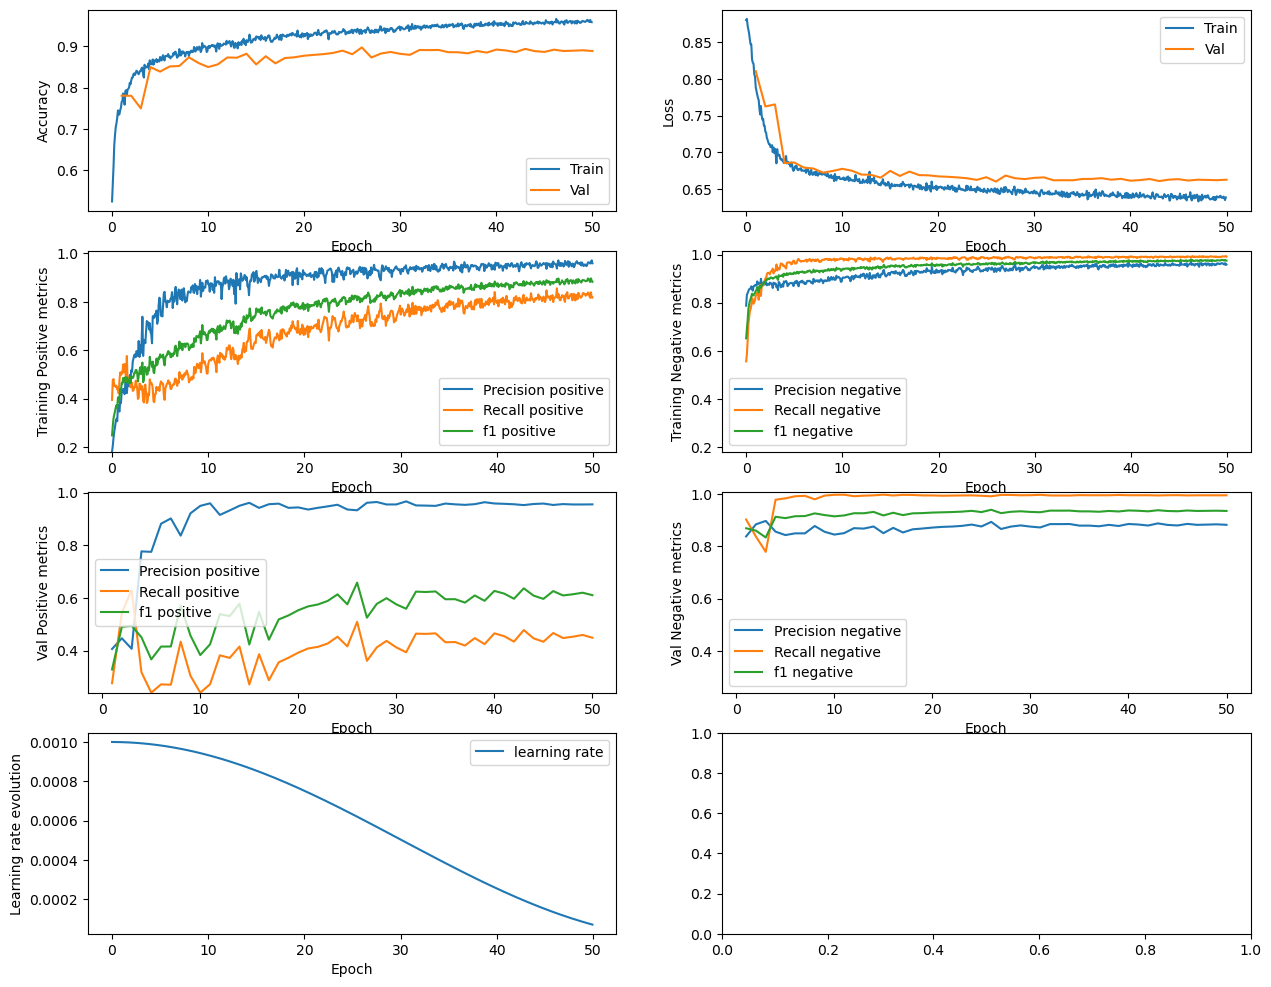

In [9]:
d_link_net_viewer = CnnViewer('models/d-link_96x96/training_save_epoch_50.tar', model_name='DLinkNet')
d_link_net_viewer.print_training_stats()

Let's now have a look at the test set images.

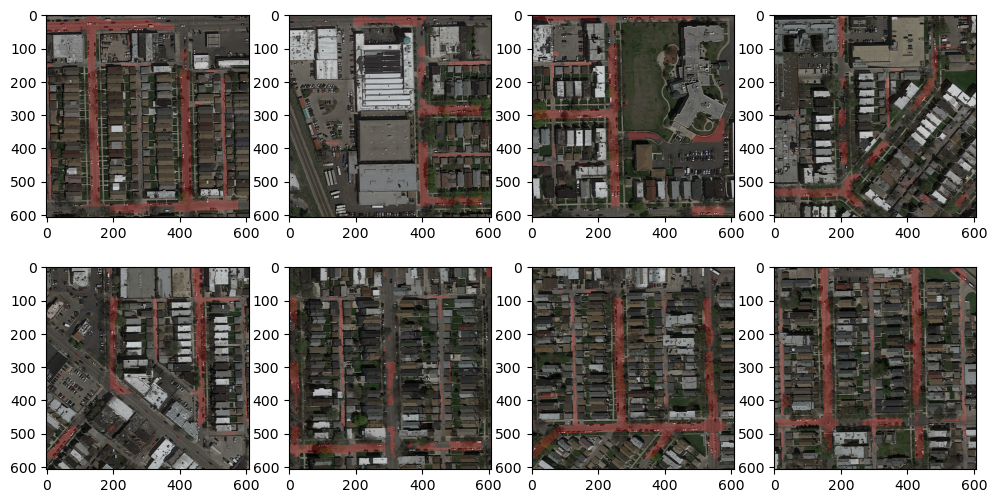

In [10]:
display_test_predictions(model=d_link_net_viewer,
                         nb=8,
                         test_images_path='dataset/test_set_images')